### Import the required libraries

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

import random
random.seed(42)
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE

### Define variables

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Data/Dataset/address_data_combined_cleaned.csv"

In [ ]:
path = "../data/address_data_combined_cleaned.csv"

In [4]:
columns = ['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Number of Tnx Error',
       'Unique Received From Addresses', 'min value received',
       'max value received ', 'avg val received', 'min val sent',
       'avg val sent', 'avg gas fee', 'total transactions (including tnx to create contract)',
       'total ether received', 'total ether balance']

In [5]:
col = ['Address', 'FLAG']

In [6]:
cols = columns+col

### Load the data

In [7]:
df = pd.read_csv(data_path, usecols=cols)

In [8]:
df.head()

,Address,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Number of Tnx Error,Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,avg gas fee,total transactions (including tnx to create contract),total ether received,total ether balance,FLAG
0,0x6c96769a08ddefa92e06de0a32089272c57f79b2,32.464093,0.0,173455.65,1238,0,0.0,0.0,0.0,0.0,0.000559,0.006758,5343,0.0,-2.984179,0
1,0x73f858acd93866902f59a8b53ab5f8ae1824c74b,32.079906,0.0,173456.05,1253,0,0.0,0.0,0.0,0.0,0.000499,0.006526,5407,0.0,-2.697222,0
2,0x8dab36ee57328e700380d1fd6588bc3de5fe8ec3,32.210966,0.0,173456.05,1298,0,0.0,0.0,0.0,0.0,0.000663,0.006141,5385,0.0,-3.572697,0
3,0xc9c736bab11d24528c3543b14e610e5c6a30d921,57.475760,0.0,417906.25,57,0,0.0,0.0,0.0,0.0,0.005501,0.032492,7271,0.0,-40.000000,0
4,0xd74e2d68510786311f05a898ea6fa7a36727ee55,32.476325,0.0,173456.05,1263,0,0.0,0.0,0.0,0.0,0.000505,0.006419,5341,0.0,-2.698424,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19787 entries, 0 to 19786
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Address                                                19787 non-null  object 
 1   Avg min between sent tnx                               19787 non-null  float64
 2   Avg min between received tnx                           19787 non-null  float64
 3   Time Diff between first and last (Mins)                19787 non-null  float64
 4   Sent tnx                                               19787 non-null  int64  
 5   Received Tnx                                           19787 non-null  int64  
 6   Number of Tnx Error                                    19787 non-null  int64  
 7   Unique Received From Addresses                         19787 non-null  int64  
 8   Unique Sent To Addresses                      

### Preprocess the data

### Analyze the data

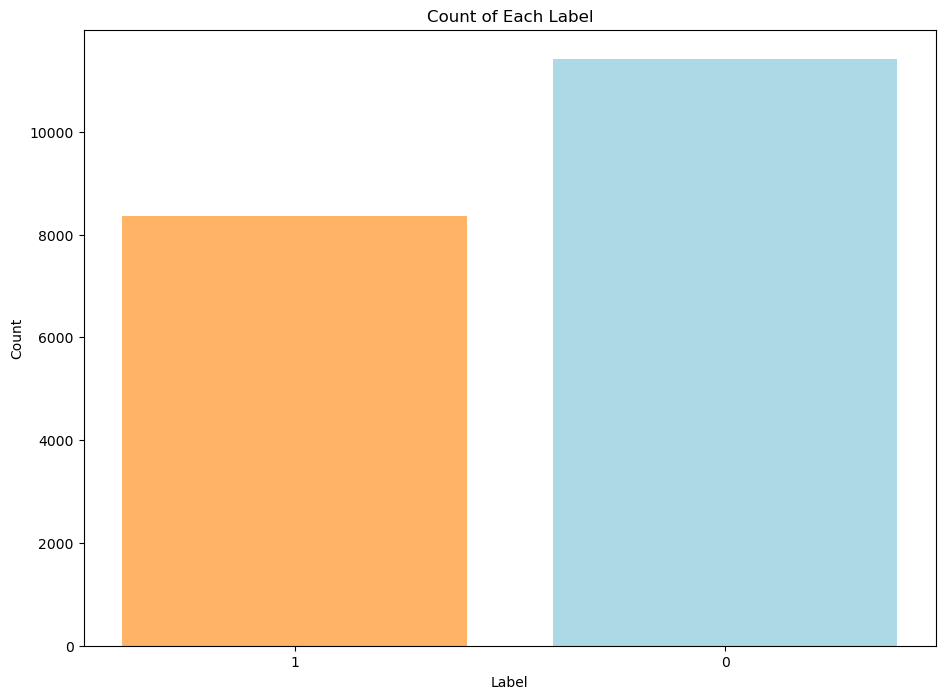

In [ ]:
# Đếm số lượng của từng nhãn
label_counts = df['FLAG'].value_counts()

# Biểu đồ cột
plt.bar(label_counts.index, label_counts.values, color=['#add8e6', '#ffb366'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.xticks(label_counts.index, ['0', '1'])  # Set labels for the x-axis
plt.show()

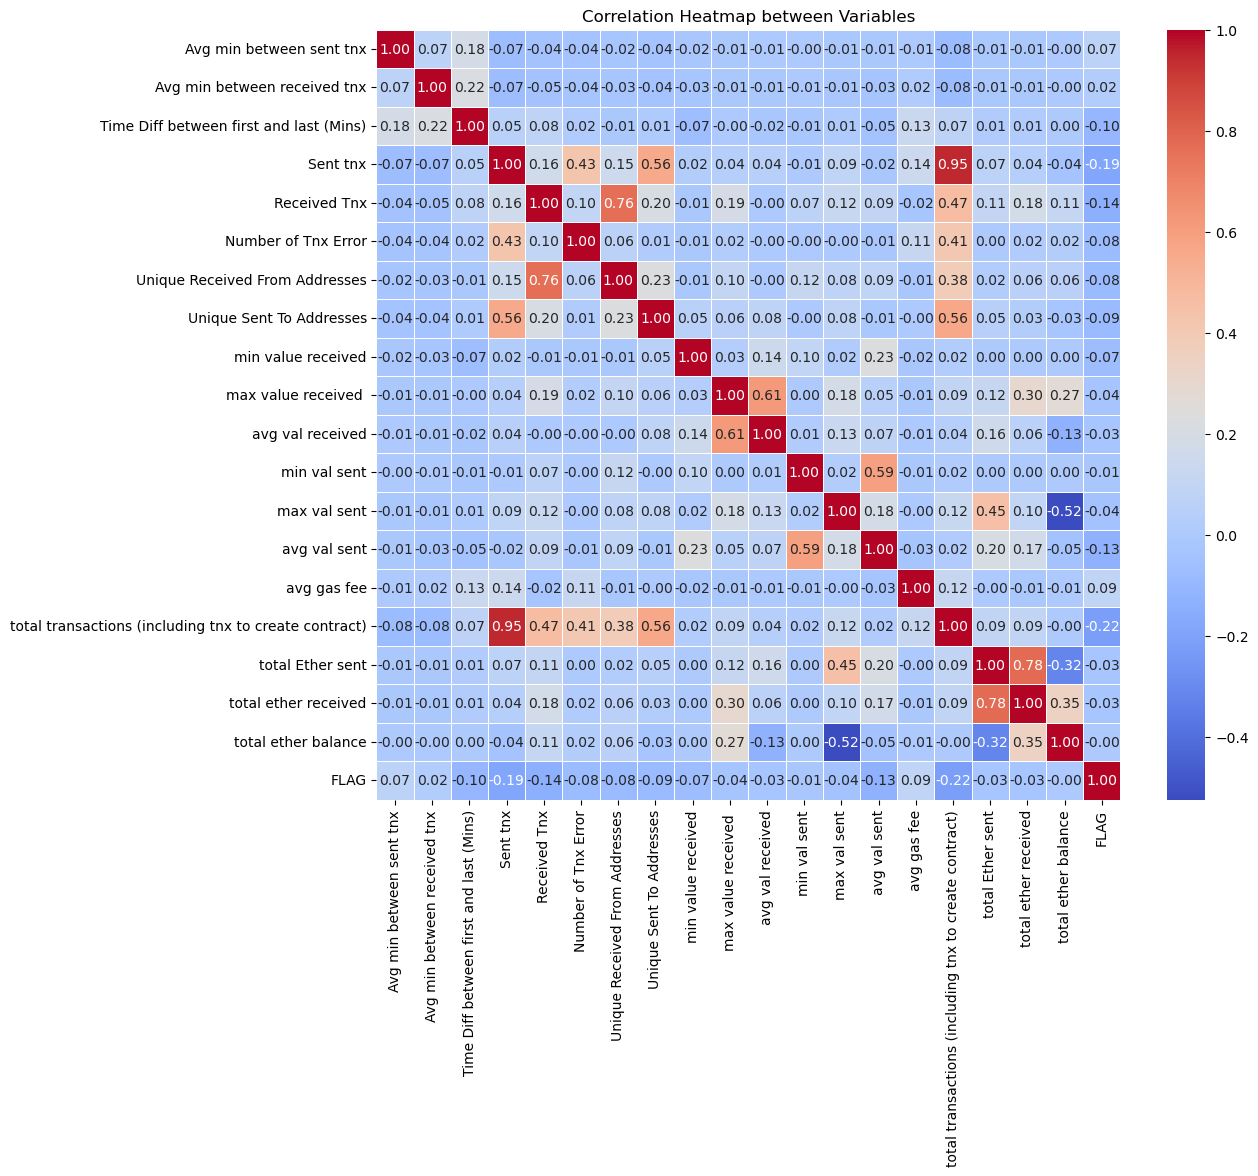

In [ ]:
sample = df.copy()
sample.drop(columns=['Address'], inplace=True)
correlation_matrix = sample.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Variables')
plt.show()

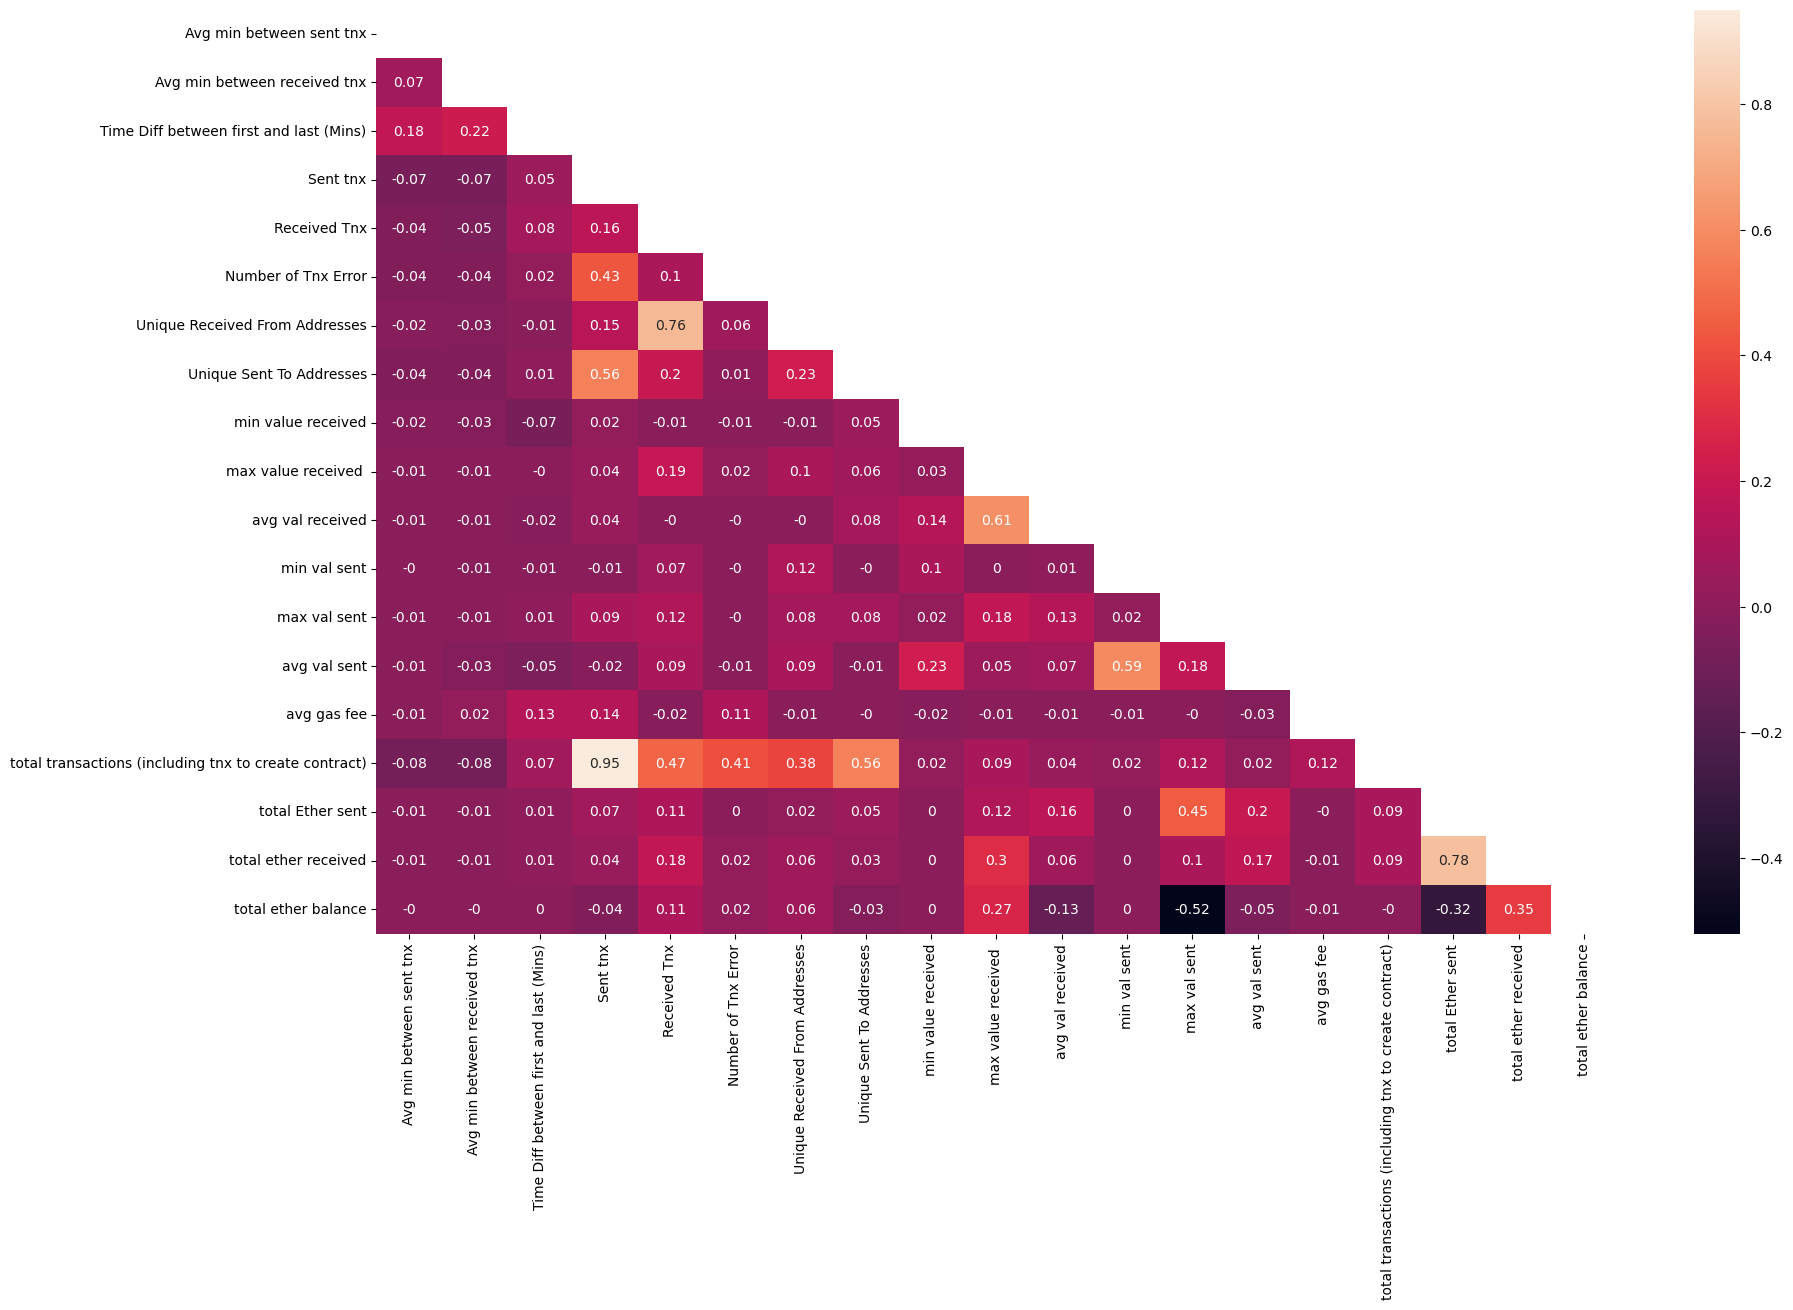

In [ ]:
# Removing Flag Label
feature_transaction_df = df.drop(columns = 'FLAG')

# Plotting Correlation Matrix to see understand which features are highly correlated
numeric_transaction_df = feature_transaction_df = df.drop(columns = 'FLAG').select_dtypes(include=np.number) #
corr_matrix = numeric_transaction_df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, mask=mask, annot = True)

# corr_matrix.style.background_gradient(cmap='coolwarm')
plt.show()

In [ ]:
X = df.drop(columns=['Address', 'FLAG'])
y = df['FLAG']

In [ ]:
# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Log transformation for skewed data and scaling
for c in columns:
    # Log transformation
    X_train_full[c] = X_train_full[c].apply(lambda x: np.log(x) if x > 0 else 0)
    X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling using only the training data to avoid data leakage
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# Checking for NaN values in the scaled training data
print(np.isnan(X_train_full_scaled).any())

# Optionally print the shape and head of the training data
print(X_train_full_scaled.shape)
print(X_train_full.head())

False
(13850, 19)
       Avg min between sent tnx  Avg min between received tnx  \
10717                  6.770663                      5.427414   
16860                  2.179287                      7.952583   
13246                  0.000000                      0.000000   
17320                  3.165475                      6.380309   
19171                  9.084052                      5.317139   

       Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
10717                                 8.289293         3             6   
16860                                13.243941       197           198   
13246                                 0.000000         0             0   
17320                                13.141950       823           831   
19171                                10.777710         5            19   

       Number of Tnx Error  Unique Received From Addresses  \
10717                  0.0                        1.609438   
16860                 

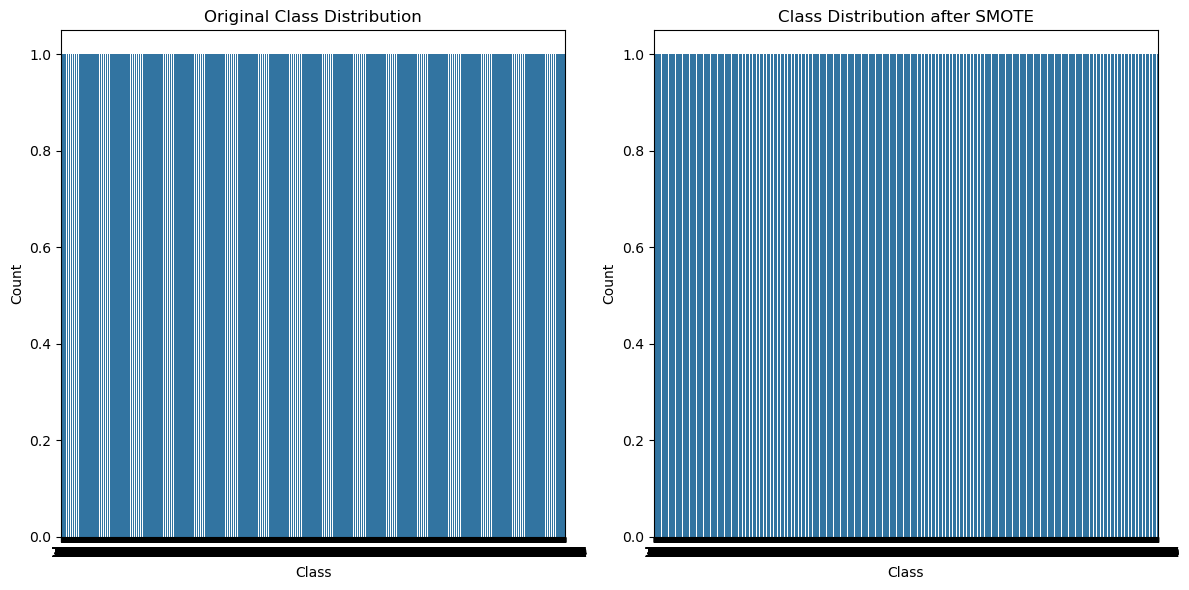

In [ ]:
# Assuming y_train_full contains the labels
plt.figure(figsize=(12, 6))

# Plot original class distribution
plt.subplot(1, 2, 1)
sns.countplot(y_train_full)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_full, y_train_full)

# Plot balanced class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(y_train_balanced)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()